<a href="https://colab.research.google.com/github/alpharmike/pytorch-hands-on/blob/main/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Sun Mar 31 12:13:56 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   58C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.1+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

    # Download pizza, steak, sushi data
    with open(data_path / "pizza_steak_sushi.zip", "wb") as f:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        print("Downloading pizza, steak, sushi data...")
        f.write(request.content)

    # Unzip pizza, steak, sushi data
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip", "r") as zip_ref:
        print("Unzipping pizza, steak, sushi data...")
        zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi directory, creating one...
Unzipping pizza, steak, sushi data...


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/test'.
There are 0 directories and 31 images in 'data/pizza_steak_sushi/test/sushi'.
There are 0 directories and 19 images in 'data/pizza_steak_sushi/test/steak'.
There are 0 directories and 25 images in 'data/pizza_steak_sushi/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi/train'.
There are 0 directories and 72 images in 'data/pizza_steak_sushi/train/sushi'.
There are 0 directories and 75 images in 'data/pizza_steak_sushi/train/steak'.
There are 0 directories and 78 images in 'data/pizza_steak_sushi/train/pizza'.


In [8]:
# Setup train and testing paths
train_dir = image_path / "train"
test_dir = image_path / "test"

train_dir, test_dir

(PosixPath('data/pizza_steak_sushi/train'),
 PosixPath('data/pizza_steak_sushi/test'))

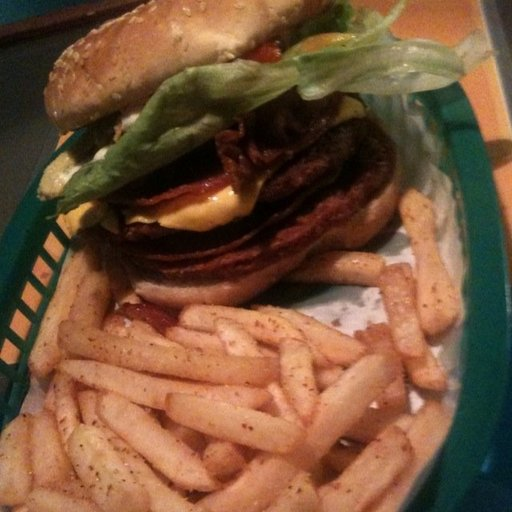

In [31]:
# Visualize an image
import random
from PIL import Image
import matplotlib.pyplot as plt

random.seed(42)

image_paths = list(image_path.glob("*/*/*.jpg"))

random_image_path = random.choice(image_paths)

image_label = random_image_path.parent.stem

random_image = Image.open(random_image_path)

random_image

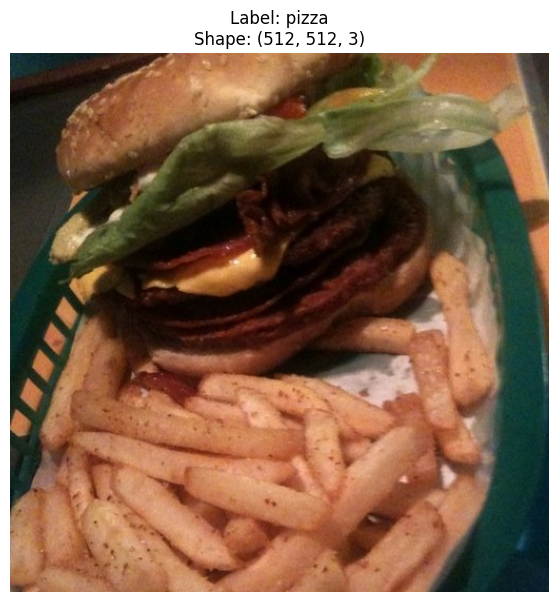

In [32]:
# Do the image visualization with matplotlib
# Turn the image into an array
import numpy as np

img_as_array = np.asarray(random_image)

# Plot the image with matplotlib
plt.figure(figsize=(10, 7))
plt.imshow(img_as_array)
plt.title(f"Label: {image_label}\nShape: {img_as_array.shape}")
plt.axis(False);

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [40]:
# 3.1 Transforming data with torchvision.transforms
from torchvision import transforms

In [30]:
# Write transform for turning images into tensors

transform_func = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.ToTensor()
])

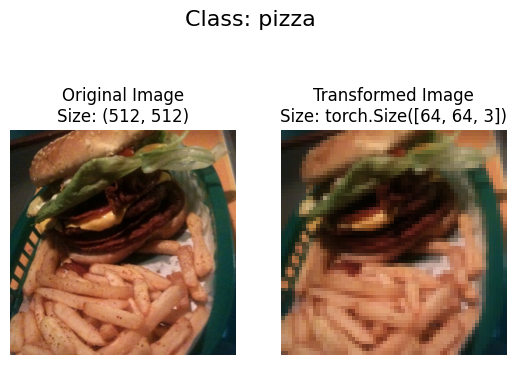

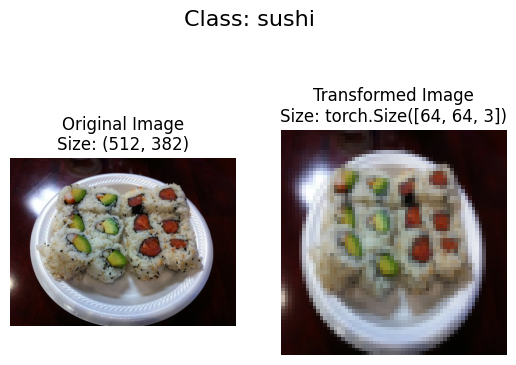

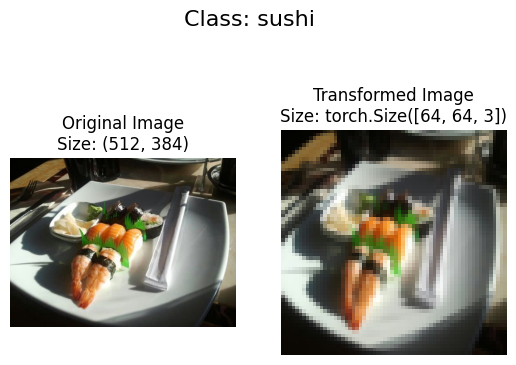

In [39]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths: list, transform, count=3, seed=42):
  random.seed(seed)
  random_image_paths = random.sample(image_paths, k=count)

  for image_path in random_image_paths:
    random_image = Image.open(image_path)

    fig, ax = plt.subplots(1, 2)

    ax[0].imshow(random_image)
    ax[0].set_title(f"Original Image\nSize: {random_image.size}")
    ax[0].axis(False)

    transformed_image = transform(random_image).permute(1, 2, 0)

    ax[1].imshow(transformed_image)
    ax[1].set_title(f"Transformed Image\nSize: {transformed_image.shape}")
    ax[1].axis(False)

    fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)


plot_transformed_images(image_paths, transform=transform_func)

### Load image data using `ImageFolder`

In [43]:
# Use ImageFolder to create dataset(s)
from torchvision import datasets
from torch.utils.data import DataLoader

train_data = datasets.ImageFolder(
    root=train_dir,
    transform=transform_func
)

test_data = datasets.ImageFolder(
    root=test_dir,
    transform=transform_func
)

print(f"Train data:\n{train_data}\nTest data:\n{test_data}")

Train data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data/pizza_steak_sushi/train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )
Test data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data/pizza_steak_sushi/test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )


In [44]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [45]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [46]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [48]:
# Turn train and test Datasets into DataLoaders

BATCH_SIZE=1

train_dataloader = DataLoader(
    dataset=train_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=os.cpu_count()
)

test_dataloader = DataLoader(
    dataset=test_data,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=os.cpu_count()
)

In [49]:
# How many batches of images are in our data loaders?
(len(train_dataloader), len(test_dataloader))

(225, 75)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [62]:
class TinyVGG(nn.Module):
  def __init__(self, input_shape: torch.Size, hidden_units: int, output_size: int):
    super().__init__()

    self.block_1 = nn.Sequential(
        nn.Conv2d(
            in_channels=input_shape[0],
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )

    self.block_2 = nn.Sequential(
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels=hidden_units,
            kernel_size=3,
            stride=1,
            padding=1
        ),
        nn.MaxPool2d(
            kernel_size=2,
            stride=2
        )
    )

    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=(input_shape[1] // 4) * (input_shape[2] // 4) * hidden_units,
            out_features=output_size
        )
    )

  def forward(self, x: torch.Tensor):
    return self.classifier(self.block_2(self.block_1(x)))

## 4. Create training and testing functions for `model_0`.

In [71]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):

  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for batch, (X, y) in enumerate(dataloader):
    # Send data to target device
    X, y = X.to(device), y.to(device)
    # 1. Forward pass
    y_pred = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_pred, y)
    train_loss += loss
    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backward
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc += (y_pred_class == y).sum().item() / len(y_pred)

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss = train_loss / len(dataloader)
  train_acc = train_acc / len(dataloader)

  return train_loss, train_acc

In [72]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):

  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for batch, (X, y) in enumerate(dataloader):
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_pred = model(X)

      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_pred, y)
      test_loss += loss
      # Calculate and accumulate accuracy
      y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
      test_acc += (y_pred_class == y).sum().item() / len(y_pred)

  # Adjust metrics to get average loss and accuracy per batch
  test_loss = test_loss / len(dataloader)
  test_acc = test_acc / len(dataloader)

  return test_loss, test_acc

In [73]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model,
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model,
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)

    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer.

In [74]:
sample_img, sample_label = train_data[0]

In [76]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

first_model_0 = TinyVGG(input_shape=sample_img.shape, hidden_units=10, output_size=len(class_names)).to(device)
NUM_EPOCHS = 5

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=first_model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
first_model_0_results = train(model=first_model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1365 | train_acc: 0.3200 | test_loss: 1.0506 | test_acc: 0.5467
Epoch: 2 | train_loss: 0.9925 | train_acc: 0.5244 | test_loss: 1.0042 | test_acc: 0.4667
Epoch: 3 | train_loss: 0.8959 | train_acc: 0.6178 | test_loss: 1.0152 | test_acc: 0.4667
Epoch: 4 | train_loss: 0.8699 | train_acc: 0.5956 | test_loss: 1.0989 | test_acc: 0.4667
Epoch: 5 | train_loss: 0.7936 | train_acc: 0.6622 | test_loss: 0.9974 | test_acc: 0.5067
Total training time: 9.049 seconds


In [77]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

second_model_0 = TinyVGG(input_shape=sample_img.shape, hidden_units=10, output_size=len(class_names)).to(device)
NUM_EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=second_model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
second_model_0_results = train(model=second_model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1366 | train_acc: 0.3200 | test_loss: 1.0486 | test_acc: 0.5333
Epoch: 2 | train_loss: 0.9924 | train_acc: 0.5289 | test_loss: 0.9950 | test_acc: 0.4800
Epoch: 3 | train_loss: 0.8996 | train_acc: 0.6089 | test_loss: 1.0181 | test_acc: 0.4533
Epoch: 4 | train_loss: 0.8604 | train_acc: 0.6000 | test_loss: 1.1356 | test_acc: 0.4800
Epoch: 5 | train_loss: 0.8038 | train_acc: 0.6711 | test_loss: 1.0349 | test_acc: 0.4800
Epoch: 6 | train_loss: 0.7182 | train_acc: 0.6933 | test_loss: 1.1728 | test_acc: 0.4000
Epoch: 7 | train_loss: 0.7037 | train_acc: 0.7022 | test_loss: 1.1626 | test_acc: 0.4800
Epoch: 8 | train_loss: 0.5639 | train_acc: 0.7600 | test_loss: 1.3898 | test_acc: 0.4533
Epoch: 9 | train_loss: 0.4655 | train_acc: 0.8444 | test_loss: 1.7210 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.3618 | train_acc: 0.8978 | test_loss: 2.0161 | test_acc: 0.3867
Epoch: 11 | train_loss: 0.2623 | train_acc: 0.9200 | test_loss: 2.0884 | test_acc: 0.3600
Epoch: 12 | train_l

In [78]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

third_model_0 = TinyVGG(input_shape=sample_img.shape, hidden_units=10, output_size=len(class_names)).to(device)
NUM_EPOCHS = 50

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=third_model_0.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
third_model_0_results = train(model=third_model_0,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1366 | train_acc: 0.3200 | test_loss: 1.0487 | test_acc: 0.5333
Epoch: 2 | train_loss: 0.9934 | train_acc: 0.5244 | test_loss: 1.0005 | test_acc: 0.4800
Epoch: 3 | train_loss: 0.9052 | train_acc: 0.6089 | test_loss: 0.9931 | test_acc: 0.4667
Epoch: 4 | train_loss: 0.8541 | train_acc: 0.6267 | test_loss: 1.2307 | test_acc: 0.4133
Epoch: 5 | train_loss: 0.8316 | train_acc: 0.6489 | test_loss: 1.0544 | test_acc: 0.5067
Epoch: 6 | train_loss: 0.7501 | train_acc: 0.6800 | test_loss: 1.2101 | test_acc: 0.4133
Epoch: 7 | train_loss: 0.7116 | train_acc: 0.7111 | test_loss: 1.2851 | test_acc: 0.4533
Epoch: 8 | train_loss: 0.5808 | train_acc: 0.7289 | test_loss: 1.3718 | test_acc: 0.4400
Epoch: 9 | train_loss: 0.4833 | train_acc: 0.8222 | test_loss: 1.5887 | test_acc: 0.4133
Epoch: 10 | train_loss: 0.3785 | train_acc: 0.8978 | test_loss: 1.9496 | test_acc: 0.4400
Epoch: 11 | train_loss: 0.2721 | train_acc: 0.9111 | test_loss: 2.3114 | test_acc: 0.4133
Epoch: 12 | train_l

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

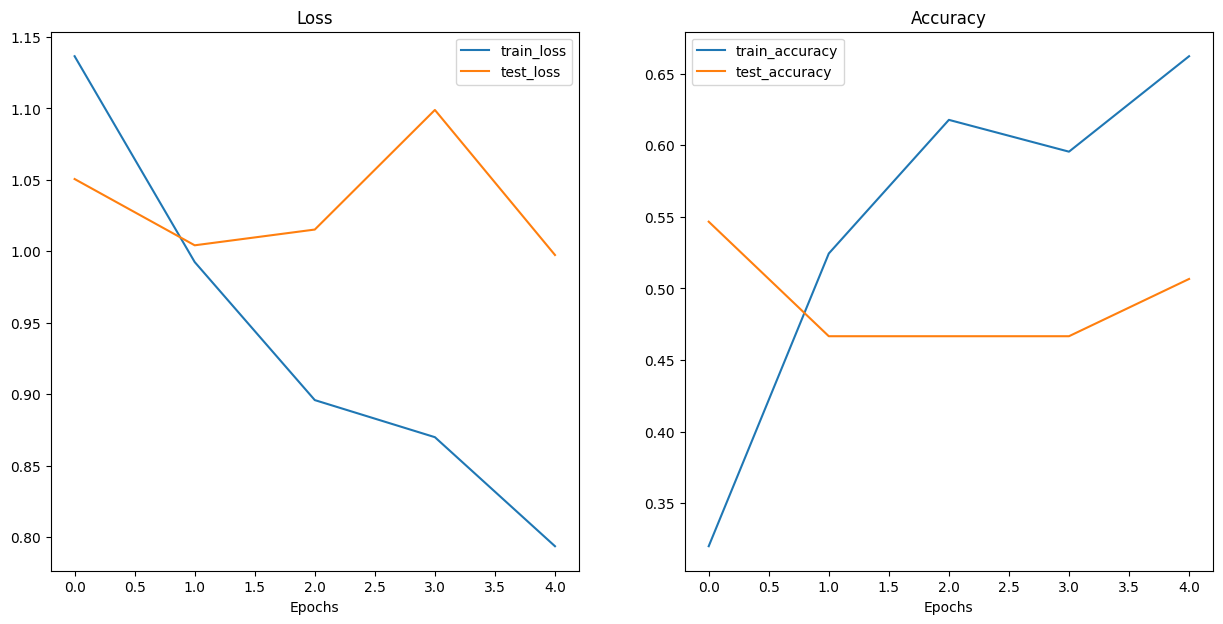

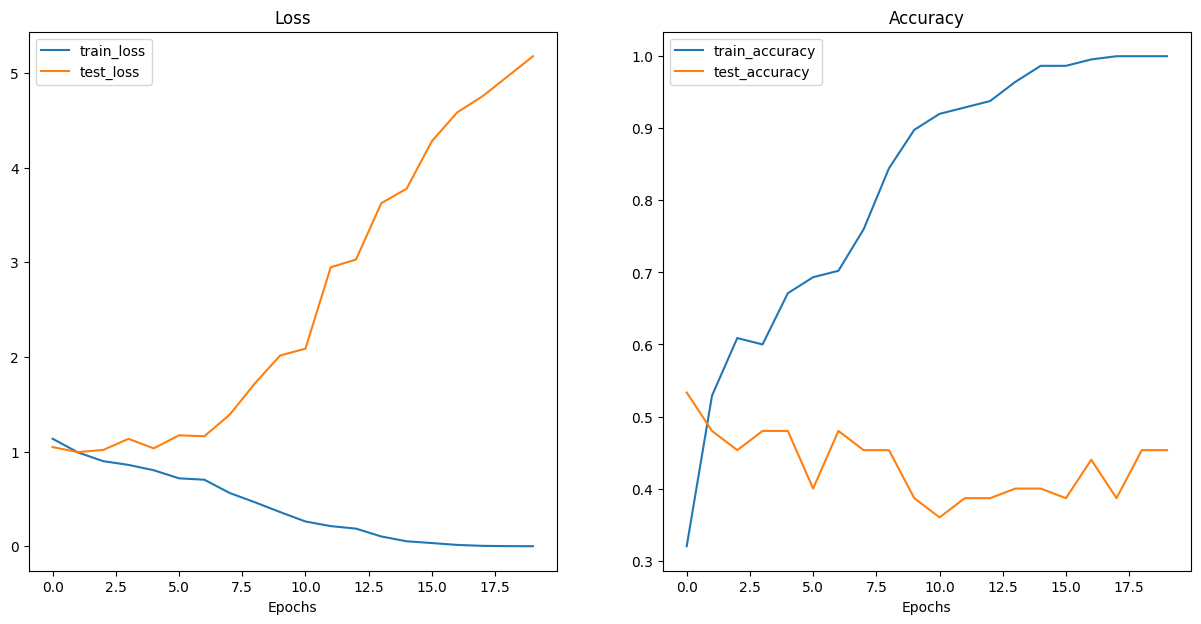

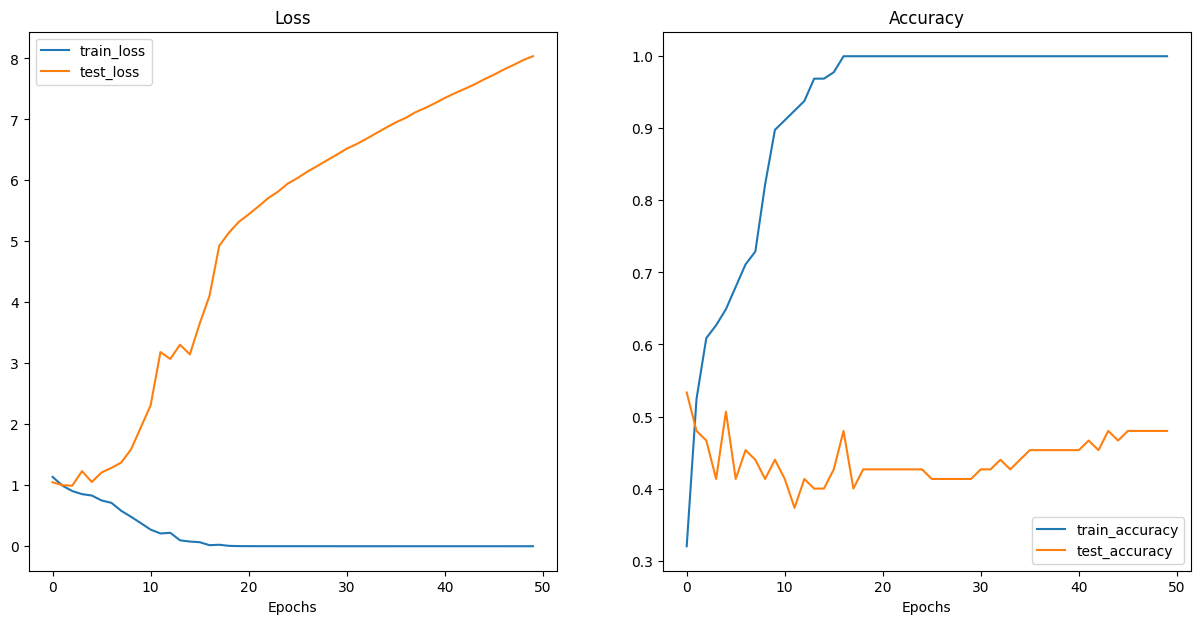

In [93]:
from typing import Dict, List

def plot_loss_curves(results: Dict[str, List[float]]):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """

    # Get the loss values of the results dictionary (training and test)
    loss = [loss_val.cpu().detach().numpy() for loss_val in results["train_loss"]]
    test_loss = [loss_val.cpu().detach().numpy() for loss_val in results["test_loss"]]

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc']
    test_accuracy = results['test_acc']

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

plot_loss_curves(first_model_0_results)
plot_loss_curves(second_model_0_results)
plot_loss_curves(third_model_0_results)

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [94]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGG(input_shape=sample_img.shape, hidden_units=20, output_size=len(class_names)).to(device)
NUM_EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(),
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_1_results = train(model=model_1,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0930 | train_acc: 0.4489 | test_loss: 1.0231 | test_acc: 0.4400
Epoch: 2 | train_loss: 0.9809 | train_acc: 0.5467 | test_loss: 1.0419 | test_acc: 0.4400
Epoch: 3 | train_loss: 0.9273 | train_acc: 0.5600 | test_loss: 1.0683 | test_acc: 0.4933
Epoch: 4 | train_loss: 0.8882 | train_acc: 0.5911 | test_loss: 1.0023 | test_acc: 0.5067
Epoch: 5 | train_loss: 0.7659 | train_acc: 0.6622 | test_loss: 0.9779 | test_acc: 0.4400
Epoch: 6 | train_loss: 0.7446 | train_acc: 0.6711 | test_loss: 1.8606 | test_acc: 0.4400
Epoch: 7 | train_loss: 0.7467 | train_acc: 0.6844 | test_loss: 1.0620 | test_acc: 0.4133
Epoch: 8 | train_loss: 0.5398 | train_acc: 0.8044 | test_loss: 2.0748 | test_acc: 0.4267
Epoch: 9 | train_loss: 0.4833 | train_acc: 0.8089 | test_loss: 1.8052 | test_acc: 0.4533
Epoch: 10 | train_loss: 0.3594 | train_acc: 0.8933 | test_loss: 1.9733 | test_acc: 0.4800
Epoch: 11 | train_loss: 0.2572 | train_acc: 0.9156 | test_loss: 2.2955 | test_acc: 0.4000
Epoch: 12 | train_l

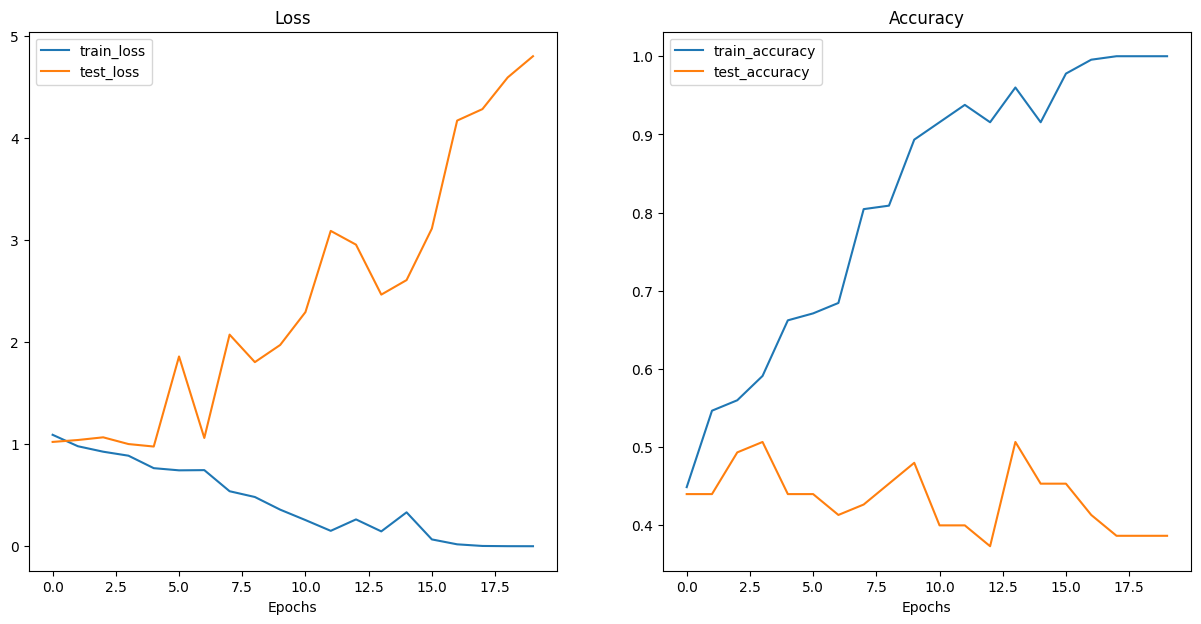

In [95]:
plot_loss_curves(model_1_results)

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [96]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it...
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)

# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...")
    zip_ref.extractall(image_path)

Did not find data/pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [97]:
# See how many images we have
walk_through_dir(image_path)

There are 2 directories and 0 images in 'data/pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/test'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/sushi'.
There are 0 directories and 58 images in 'data/pizza_steak_sushi_20_percent/test/steak'.
There are 0 directories and 46 images in 'data/pizza_steak_sushi_20_percent/test/pizza'.
There are 3 directories and 0 images in 'data/pizza_steak_sushi_20_percent/train'.
There are 0 directories and 150 images in 'data/pizza_steak_sushi_20_percent/train/sushi'.
There are 0 directories and 146 images in 'data/pizza_steak_sushi_20_percent/train/steak'.
There are 0 directories and 154 images in 'data/pizza_steak_sushi_20_percent/train/pizza'.


Excellent, we now have double the training and testing images...

In [98]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(PosixPath('data/pizza_steak_sushi_20_percent/train'),
 PosixPath('data/pizza_steak_sushi_20_percent/test'))

In [134]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),
  transforms.TrivialAugmentWide(num_magnitude_bins=31), # how intense
  transforms.ToTensor()
])

BATCH_SIZE = 1

# Create datasets
train_data_20_percent = ImageFolder(
    root=train_data_20_percent_path,
    transform=simple_transform
)

test_data_20_percent = ImageFolder(
    root=test_data_20_percent_path,
    transform=simple_transform
)

# Create dataloaders
train_dataloader_20_percent = DataLoader(
    dataset=train_data_20_percent,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=os.cpu_count()
)

test_dataloader_20_percent = DataLoader(
    dataset=test_data_20_percent,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=os.cpu_count()
)

In [138]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGG(input_shape=sample_img.shape, hidden_units=10, output_size=len(class_names)).to(device)
NUM_EPOCHS = 20

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_2.parameters(),

                             lr=0.001)

# Start the timer
from timeit import default_timer as timer
start_time = timer()

# Train model_0
model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader_20_percent,
                        test_dataloader=test_dataloader_20_percent,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1088 | train_acc: 0.4022 | test_loss: 1.0343 | test_acc: 0.4867
Epoch: 2 | train_loss: 1.0551 | train_acc: 0.4489 | test_loss: 1.0266 | test_acc: 0.4733
Epoch: 3 | train_loss: 1.0196 | train_acc: 0.4600 | test_loss: 0.9438 | test_acc: 0.5267
Epoch: 4 | train_loss: 0.9895 | train_acc: 0.4933 | test_loss: 0.9200 | test_acc: 0.5733
Epoch: 5 | train_loss: 1.0105 | train_acc: 0.4556 | test_loss: 0.9693 | test_acc: 0.5200
Epoch: 6 | train_loss: 0.9407 | train_acc: 0.5533 | test_loss: 0.9920 | test_acc: 0.5133
Epoch: 7 | train_loss: 0.9696 | train_acc: 0.5422 | test_loss: 0.9885 | test_acc: 0.5067
Epoch: 8 | train_loss: 0.9130 | train_acc: 0.5689 | test_loss: 0.9685 | test_acc: 0.5200
Epoch: 9 | train_loss: 0.9198 | train_acc: 0.5711 | test_loss: 1.0411 | test_acc: 0.5000
Epoch: 10 | train_loss: 0.9129 | train_acc: 0.5622 | test_loss: 0.9881 | test_acc: 0.4933
Epoch: 11 | train_loss: 0.8881 | train_acc: 0.5956 | test_loss: 0.9610 | test_acc: 0.5533
Epoch: 12 | train_l

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction.
* Does the model you trained in exercise 7 get it right?
* If not, what do you think you could do to improve it?

In [132]:
# Download custom image
import requests

# Setup custom image path
custom_image_path = data_path / "custom-steak-image.jpg"

# Download the image if it doesn't already exist
if not custom_image_path.is_file():
    with open(custom_image_path, "wb") as f:
        # When downloading from GitHub, need to use the "raw" file link
        request = requests.get("https://www.allrecipes.com/thmb/3cixVDmAtbb2hYxoFLVJ4VPQ7rA=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/143809-best-steak-marinade-in-existence-ARMag-1x1-1-8105b6b8e5cb4931ba8061f0425243dd.jpg")
        print(f"Downloading {custom_image_path}...")
        f.write(request.content)
else:
    print(f"{custom_image_path} already exists, skipping download.")

In [127]:
import torchvision

def pred_and_plot_image(model: torch.nn.Module,
                        image_path: str,
                        class_names: List[str] = None,
                        transform=None,
                        device: torch.device = device):
    """Makes a prediction on a target image and plots the image with its prediction."""

    # 1. Load in image and convert the tensor values to float32
    target_image = Image.open(image_path)

    # 2. Divide the image pixel values by 255 to get them between [0, 1]
    # target_image = target_image / 255.

    # 3. Transform if necessary
    if transform:
        target_image = transform(target_image)

    # 4. Make sure the model is on the target device
    model.to(device)

    # 5. Turn on model evaluation mode and inference mode
    model.eval()
    with torch.inference_mode():
        # Add an extra dimension to the image
        target_image = target_image.unsqueeze(dim=0)

        # Make a prediction on image with an extra dimension and send it to the target device
        target_image_pred = model(target_image.to(device))

    # 6. Convert logits -> prediction probabilities (using torch.softmax() for multi-class classification)
    target_image_pred_probs = torch.softmax(target_image_pred, dim=1)

    # 7. Convert prediction probabilities -> prediction labels
    target_image_pred_label = torch.argmax(target_image_pred_probs, dim=1)

    # 8. Plot the image alongside the prediction and prediction probability
    plt.imshow(target_image.squeeze().permute(1, 2, 0)) # make sure it's the right size for matplotlib
    if class_names:
        title = f"Pred: {class_names[target_image_pred_label.cpu()]} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    else:
        title = f"Pred: {target_image_pred_label} | Prob: {target_image_pred_probs.max().cpu():.3f}"
    plt.title(title)
    plt.axis(False);

torch.Size([3, 64, 64])


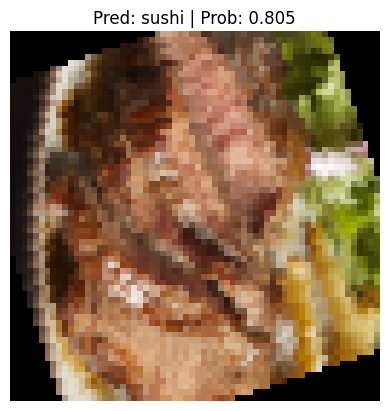

In [139]:
pred_and_plot_image(
    model=model_2,
    image_path=custom_image_path,
    class_names=class_names,
    transform=simple_transform
)